In [1]:
import brainsss
import os
import sys
import numpy as np
import argparse
import subprocess
import json
from time import time
import nibabel as nib
import h5py
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matplotlib.__version__

'3.3.4'

In [2]:
np.__version__

'1.18.1'

In [3]:
os.listdir("/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_105/func_0/")

['brain_zscored_red.nii',
 'glm',
 'brain_zscored_red_high_pass_masked_warped.nii',
 'brain_zscored_green_high_pass.nii',
 'moco',
 'brain_zscored_red_high_pass_masked.nii',
 'brain_zscored_green_high_pass_masked.nii',
 'pca',
 'brain_zscored_green_high_pass_masked_warped.nii',
 'mask.nii',
 'brain_zscored_red_high_pass.nii',
 'expt.json',
 'corr',
 'fictrac',
 'imaging',
 'brain_zscored_green.nii']

In [2]:
# How to make new directories for new files
directory = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_130/func_0/moco"
filename = "functional_channel_1_moco.h5"
file = os.path.join(directory, filename)# add one more directory
parent_dir = os.path.dirname(directory)# remove last directory
savename = filename.split('.')[0] + '_zscore.h5'#"functional_channel_1_moco" "h5"
savefile = os.path.join(parent_dir, savename)

In [5]:
meanbrain = meanbrain + data[:,:,:,i]

NameError: name 'meanbrain' is not defined

In [6]:
running_sum = 0
for i in [6,3,5,7]:
    running_sum += i
mean = running_sum / 4
print(mean)

5.25


In [7]:
dims = (256, 128, 49, 3384)

In [8]:
stepsize = 100
steps = list(range(0,dims[-1],stepsize))
steps.append(dims[-1])
print(steps)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3384]


In [11]:
stepsize_1 = 72
steps_1 = list(range(0,dims[-1] +1,stepsize_1))
print(steps_1)

[0, 72, 144, 216, 288, 360, 432, 504, 576, 648, 720, 792, 864, 936, 1008, 1080, 1152, 1224, 1296, 1368, 1440, 1512, 1584, 1656, 1728, 1800, 1872, 1944, 2016, 2088, 2160, 2232, 2304, 2376, 2448, 2520, 2592, 2664, 2736, 2808, 2880, 2952, 3024, 3096, 3168, 3240, 3312, 3384]


In [23]:
len(steps_1)

48

In [33]:
for chunk_num in range(len(steps)):
    if chunk_num + 1 <= len(steps)-1:
        chunkstart = steps[chunk_num]
        chunkend = steps[chunk_num + 1]
        print(F"Chunkstart: {chunkstart} Chunkend: {chunkend}")
        #data[:,:,:,chunkstart:chunkend]

Chunkstart: 0 Chunkend: 100
Chunkstart: 100 Chunkend: 200
Chunkstart: 200 Chunkend: 300
Chunkstart: 300 Chunkend: 400
Chunkstart: 400 Chunkend: 500
Chunkstart: 500 Chunkend: 600
Chunkstart: 600 Chunkend: 700
Chunkstart: 700 Chunkend: 800
Chunkstart: 800 Chunkend: 900
Chunkstart: 900 Chunkend: 1000
Chunkstart: 1000 Chunkend: 1100
Chunkstart: 1100 Chunkend: 1200
Chunkstart: 1200 Chunkend: 1300
Chunkstart: 1300 Chunkend: 1400
Chunkstart: 1400 Chunkend: 1500
Chunkstart: 1500 Chunkend: 1600
Chunkstart: 1600 Chunkend: 1700
Chunkstart: 1700 Chunkend: 1800
Chunkstart: 1800 Chunkend: 1900
Chunkstart: 1900 Chunkend: 2000
Chunkstart: 2000 Chunkend: 2100
Chunkstart: 2100 Chunkend: 2200
Chunkstart: 2200 Chunkend: 2300
Chunkstart: 2300 Chunkend: 2400
Chunkstart: 2400 Chunkend: 2500
Chunkstart: 2500 Chunkend: 2600
Chunkstart: 2600 Chunkend: 2700
Chunkstart: 2700 Chunkend: 2800
Chunkstart: 2800 Chunkend: 2900
Chunkstart: 2900 Chunkend: 3000
Chunkstart: 3000 Chunkend: 3100
Chunkstart: 3100 Chunkend: 32

In [34]:
#OG script--single volumes loaded
with h5py.File(file, 'r') as hf:
    data = hf['data'] # this doesn't actually LOAD the data - it is just a proxy
    #dims = np.shape(data)
    dims = (256,128,49,10)
    running_sum = np.zeros(dims[:3])
    
    for i in range(dims[-1]):
        t0 = time()
        running_sum += data[:,:,:,i]
        #if i % 10 == 0:
        print(F"vol: {i} time: {time()-t0}")
    meanbrain = running_sum / dims[-1]
    
    total = 0
    for i in range(dims[-1]):
        s = (data[:,:,:,i]-meanbrain)**2
        total = s + total 
    final_std = np.sqrt(total/dims[-1]) 

    with h5py.File(savefile, 'w') as f:
        dset = f.create_dataset('data', dims, dtype='float32', chunks=True) 

        for i in range(dims[-1]):
            t0 = time()
            e = (data[:,:,:,i] - meanbrain)/final_std
            f['data'][:,:,:,i] = e
            print(time()-t0)

vol: 0 time: 11.298824310302734
vol: 1 time: 0.3482975959777832
vol: 2 time: 0.27696752548217773
vol: 3 time: 0.2741866111755371
vol: 4 time: 0.2743508815765381
vol: 5 time: 0.27605557441711426
vol: 6 time: 0.2802586555480957
vol: 7 time: 0.27535104751586914
vol: 8 time: 0.27327466011047363
vol: 9 time: 0.2764730453491211
0.35131144523620605
0.31884098052978516
0.3162412643432617
0.31354665756225586
0.31212830543518066
0.31043028831481934
0.3143644332885742
0.31185293197631836
0.3109548091888428
0.31116223335266113


In [3]:
with h5py.File(file, 'r') as hf:
    data = hf['data'][:]

In [4]:
data.shape

(256, 128, 49, 3384)

In [5]:
meandata = np.mean(data,axis=-1)
stddata = np.std(data,axis=-1)

In [6]:
zscoredata = (data - meandata[...,None])/stddata[...,None]

In [7]:
zscoredata.shape

(256, 128, 49, 3384)

In [9]:
zscoredata[0,0,0,0]

-0.2760485

In [8]:
data = None

In [28]:
with h5py.File(savefile, 'r') as hf:
    data = hf['data'][:]

In [27]:
data

<Closed HDF5 dataset>

In [ ]:
savefile

In [18]:
#Chunked brains
with h5py.File(file, 'r') as hf:
    data = hf['data'] # this doesn't actually LOAD the data - it is just a proxy
    dims = np.shape(data)
    running_sum = np.zeros(dims[:3])
    running_sumofsq = np.zeros(dims[:3])
    
    stepsize = 100
    steps = list(range(0,dims[-1],stepsize))
    steps.append(dims[-1])
    for chunk_num in range(len(steps)):
        t0 = time()
        if chunk_num + 1 <= len(steps)-1:
            chunkstart = steps[chunk_num]
            chunkend = steps[chunk_num + 1]
            chunk = data[:,:,:,chunkstart:chunkend]
            running_sum += np.sum(chunk, axis=3)
            print(F"vol: {chunkstart} to {chunkend} time: {time()-t0}")
    meanbrain = running_sum / dims[-1]

vol: 0 to 100 time: 0.3635213375091553
vol: 100 to 200 time: 0.36054515838623047
vol: 200 to 300 time: 0.5346741676330566
vol: 300 to 400 time: 0.35138750076293945
vol: 400 to 500 time: 0.5174827575683594
vol: 500 to 600 time: 0.3509397506713867
vol: 600 to 700 time: 0.51633620262146
vol: 700 to 800 time: 0.35076475143432617
vol: 800 to 900 time: 0.5170526504516602
vol: 900 to 1000 time: 0.3512458801269531
vol: 1000 to 1100 time: 0.5154271125793457
vol: 1100 to 1200 time: 0.3453671932220459
vol: 1200 to 1300 time: 0.5053737163543701
vol: 1300 to 1400 time: 0.348402738571167
vol: 1400 to 1500 time: 0.5107107162475586
vol: 1500 to 1600 time: 0.3489542007446289
vol: 1600 to 1700 time: 0.5049166679382324
vol: 1700 to 1800 time: 0.34565186500549316
vol: 1800 to 1900 time: 0.346926212310791
vol: 1900 to 2000 time: 0.5156040191650391
vol: 2000 to 2100 time: 0.3480794429779053
vol: 2100 to 2200 time: 0.5023009777069092
vol: 2200 to 2300 time: 0.3426237106323242
vol: 2300 to 2400 time: 0.497824

In [7]:
meandata.shape, meanbrain.shape

((256, 128, 49), (256, 128, 49))

In [8]:
meandata[0,0,0], meanbrain[0,0,0]

(41.41925, 41.4192529231944)

In [11]:
#Chunked brains
with h5py.File(file, 'r') as hf:
    data = hf['data'] # this doesn't actually LOAD the data - it is just a proxy
    dims = np.shape(data)
    running_sum = np.zeros(dims[:3])
    running_sumofsq = np.zeros(dims[:3])
    
    stepsize = 100
    steps = list(range(0,dims[-1],stepsize))
    steps.append(dims[-1])
    for chunk_num in range(len(steps)):
        t0 = time()
        if chunk_num + 1 <= len(steps)-1:
            chunkstart = steps[chunk_num]
            chunkend = steps[chunk_num + 1]
            chunk = data[:,:,:,chunkstart:chunkend]
            running_sum += np.sum(chunk, axis=3)
            print(F"vol: {chunkstart} to {chunkend} time: {time()-t0}")
    meanbrain = running_sum / dims[-1]

    for chunk_num in range(len(steps)):
        t0 = time()
        if chunk_num + 1 <= len(steps)-1:
            chunkstart = steps[chunk_num]
            chunkend = steps[chunk_num + 1]
            chunk = data[:,:,:,chunkstart:chunkend]
            running_sumofsq += np.sum((chunk-meanbrain[...,None])**2, axis=3)
            print(F"vol: {chunkstart} to {chunkend} time: {time()-t0}")
    final_std = np.sqrt(running_sumofsq/dims[-1])

    with h5py.File(savefile, 'w') as f:
        dset = f.create_dataset('data', dims, dtype='float32', chunks=True) 
        
        for chunk_num in range(len(steps)):
            t0 = time()
            if chunk_num + 1 <= len(steps)-1:
                chunkstart = steps[chunk_num]
                chunkend = steps[chunk_num + 1]
                chunk = data[:,:,:,chunkstart:chunkend]
                running_sumofsq += np.sum((chunk-meanbrain[...,None])**2, axis=3)
                zscored = (chunk - meanbrain[...,None]) / final_std[:,:,:,None]
                f['data'][:,:,:,chunkstart:chunkend] = zscored
                print(F"vol: {chunkstart} to {chunkend} time: {time()-t0}")

#             for i in range(dims[-1]):
#                 t0 = time()
#                 e = (data[:,:,:,i] - meanbrain)/final_std
#                 f['data'][:,:,:,i] = e
#                 print(time()-t0)

vol: 0 to 100 time: 0.6203935146331787
vol: 100 to 200 time: 0.6224520206451416
vol: 200 to 300 time: 0.9467923641204834
vol: 300 to 400 time: 0.6368544101715088
vol: 400 to 500 time: 0.9591999053955078
vol: 500 to 600 time: 0.6324102878570557
vol: 600 to 700 time: 0.94742751121521
vol: 700 to 800 time: 0.6197738647460938
vol: 800 to 900 time: 0.931804895401001
vol: 900 to 1000 time: 0.6148617267608643
vol: 1000 to 1100 time: 0.9230303764343262
vol: 1100 to 1200 time: 0.6163287162780762
vol: 1200 to 1300 time: 0.9403901100158691
vol: 1300 to 1400 time: 0.6317293643951416
vol: 1400 to 1500 time: 0.9380331039428711
vol: 1500 to 1600 time: 0.6329519748687744
vol: 1600 to 1700 time: 0.9149825572967529
vol: 1700 to 1800 time: 0.6386477947235107
vol: 1800 to 1900 time: 0.6330502033233643
vol: 1900 to 2000 time: 0.9471454620361328
vol: 2000 to 2100 time: 0.6247134208679199
vol: 2100 to 2200 time: 0.9405927658081055
vol: 2200 to 2300 time: 0.6196033954620361
vol: 2300 to 2400 time: 0.929146528

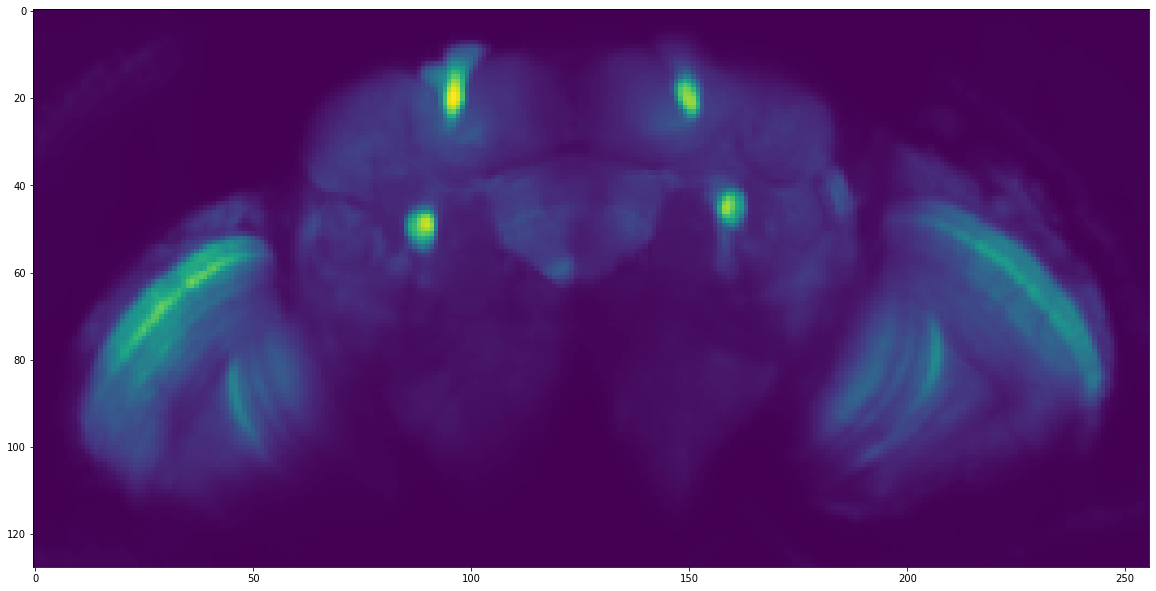

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(meanbrain[:,:,20].T)